### Machine Learning Algorithm

- 지도 학습 : supervised learning
- 비지도 학습 : unsupervised learning
- 강화 학습 : reinforcement learning

### 지도 학습 Supervised Learning


k-NN(k-Nearest Neighbor)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier  # classfier: 분류기

$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    6 & 7 \\
    7 & 8 \\
    8 & 9

    \end{pmatrix}
$$

In [2]:
x_train = np.array([[i, i+1] for i in range(1,9) if i not in (4,5)])
y_train = np.array([0,0,0,1,1,1])

In [3]:
# 모델 테스트용 데이터
x_test = np.array([[5,4]])

In [4]:
# k-NN setting
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [5]:
# Test
predicted_label = knn.predict(x_test)
predicted_label

array([0])

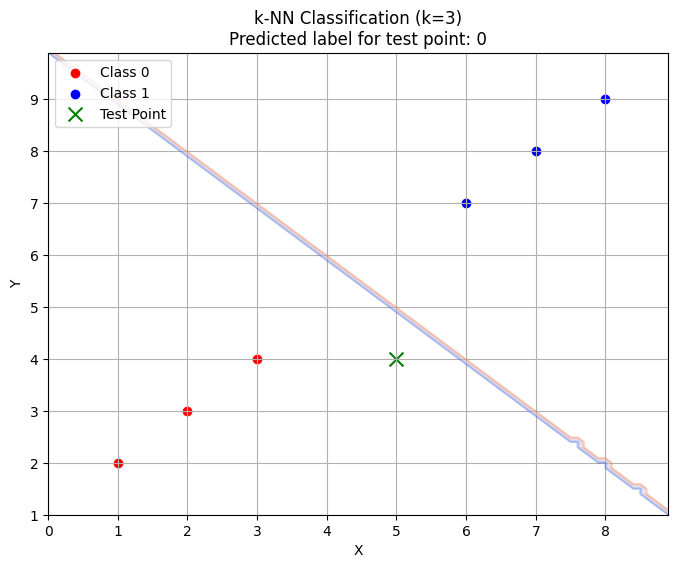

In [6]:
plt.figure(figsize=(8,6))
for i, point in enumerate(x_train):
    # point[0] : x좌표
    # point[1] : y좌표
    # c='r' if y_train[i]==0 else 'b' : 사망연산자
    plt.scatter(point[0], point[1], c='r' if y_train[i]==0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i==0 else ('Class 1' if y_train[i]==1 and i==3 else ''))
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:, 0].min()-1, x_train[:, 0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"k-NN Classification (k={K})\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

SVM(Support Vector Machine)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [8]:
# 복잡한 샘플 생성
X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2)

# test data
X_test = np.array([[0,0]])

In [9]:
# 모델 생성
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [10]:
# 예측
predicted_label = svm_model.predict(X_test)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9052\477533728.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='k')


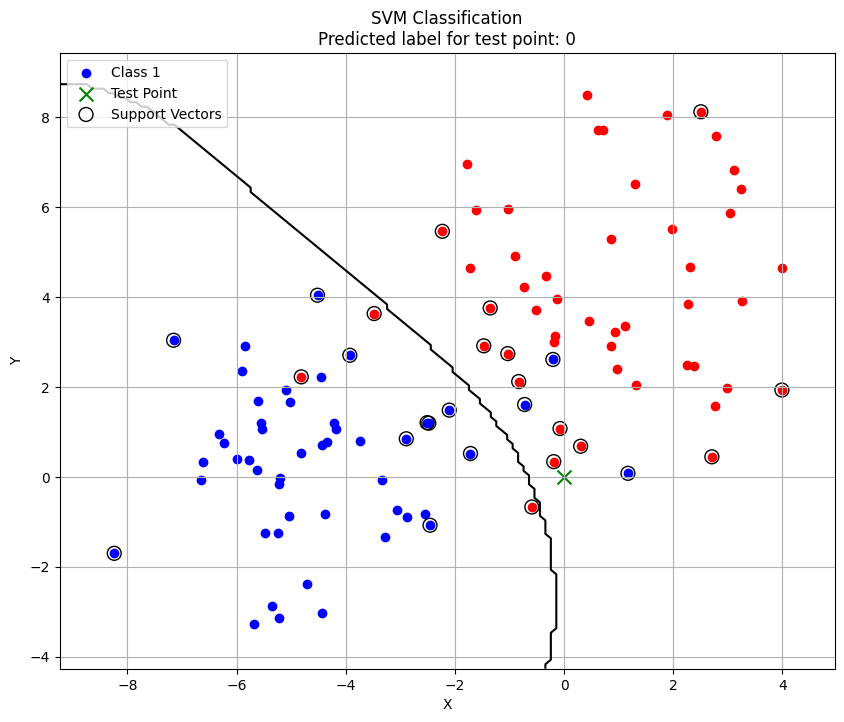

In [11]:
plt.figure(figsize=(10,8))
for i, point in enumerate(X_train):
    # point[0] : x좌표
    # point[1] : y좌표
    # c='r' if y_train[i]==0 else 'b' : 사망연산자
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k',
            label='Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

검정색 동그라미 외곽선 : 마지노선 값 \
contour선(검정) : 값을 분류하는 기준선을 그려줌\
연구원들의 난제.. 오차값을 포함할 것인가 말것인가 -> 진단에 영향을 줄 수 있음

In [12]:
def scatter_vis(X_train, y_train, X_test,model, figsize=(6,6)):
    """_summary_

    Args:
        X_train (_type_): 훈련데이터셋
        y_train (_type_): 훈련 데이터 레이블
        X_test (_type_): 테스트용 데이터
        model (_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional):Defaults to (6,6).
    """
    plt.figure(figsize=figsize)
    for i, point in enumerate(X_train):
        # point[0] : x좌표
        # point[1] : y좌표
        # c='r' if y_train[i]==0 else 'b' : 사망연산자
        plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i]==0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

    plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label='Test Point')

    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    return xx, yy, Z

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9052\703319034.py:3: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='k')


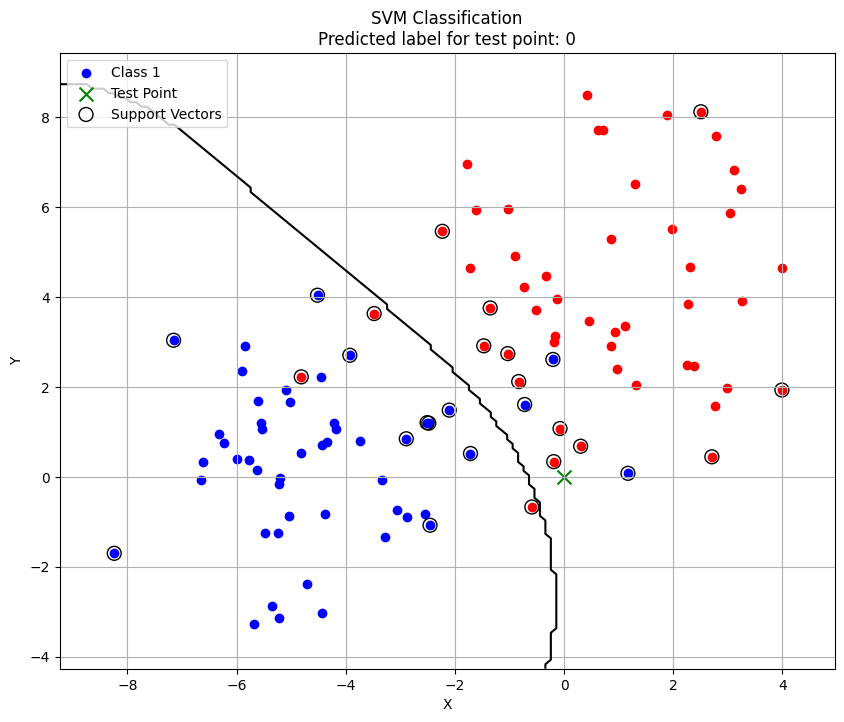

In [13]:
scatter_vis(X_train, y_train, X_test,svm_model, figsize=(10,8))

plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k',
            label='Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

Decision Tree

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [15]:
# 복잡한 샘플 데이터 생성
X_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 테스트 데이터
X_test = np.array([[0,0]])

In [16]:
# DC tree 훈련
# 최적화 훈련 -> 일단 기본값 -> parameter 조절
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# 예측
predicted_label = tree_model.predict(X_test)

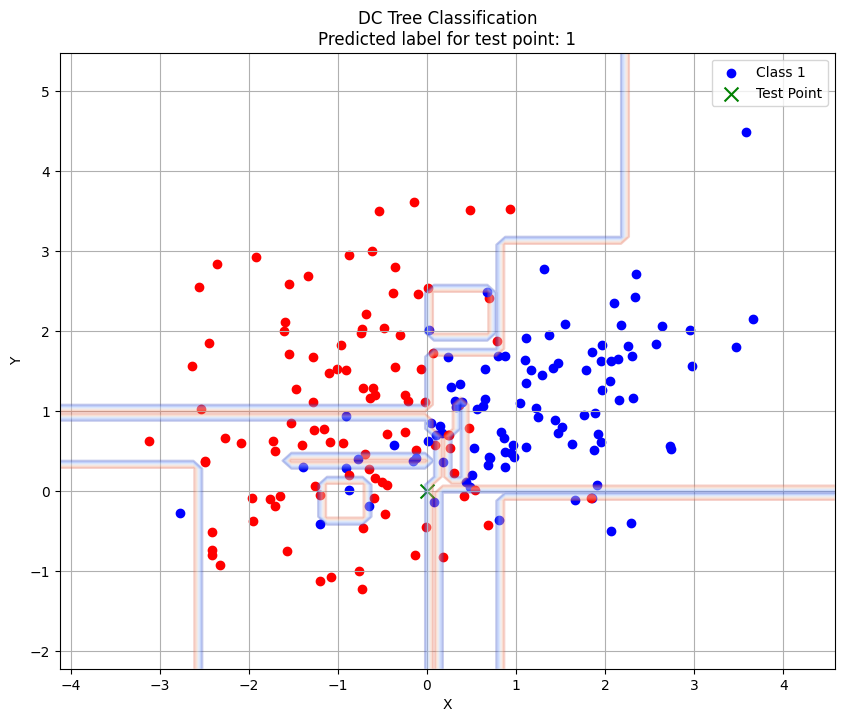

In [21]:
# 트리모델 시각화
plt.figure(figsize=(10,8))
for i, point in enumerate(X_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i]==0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"DC Tree Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

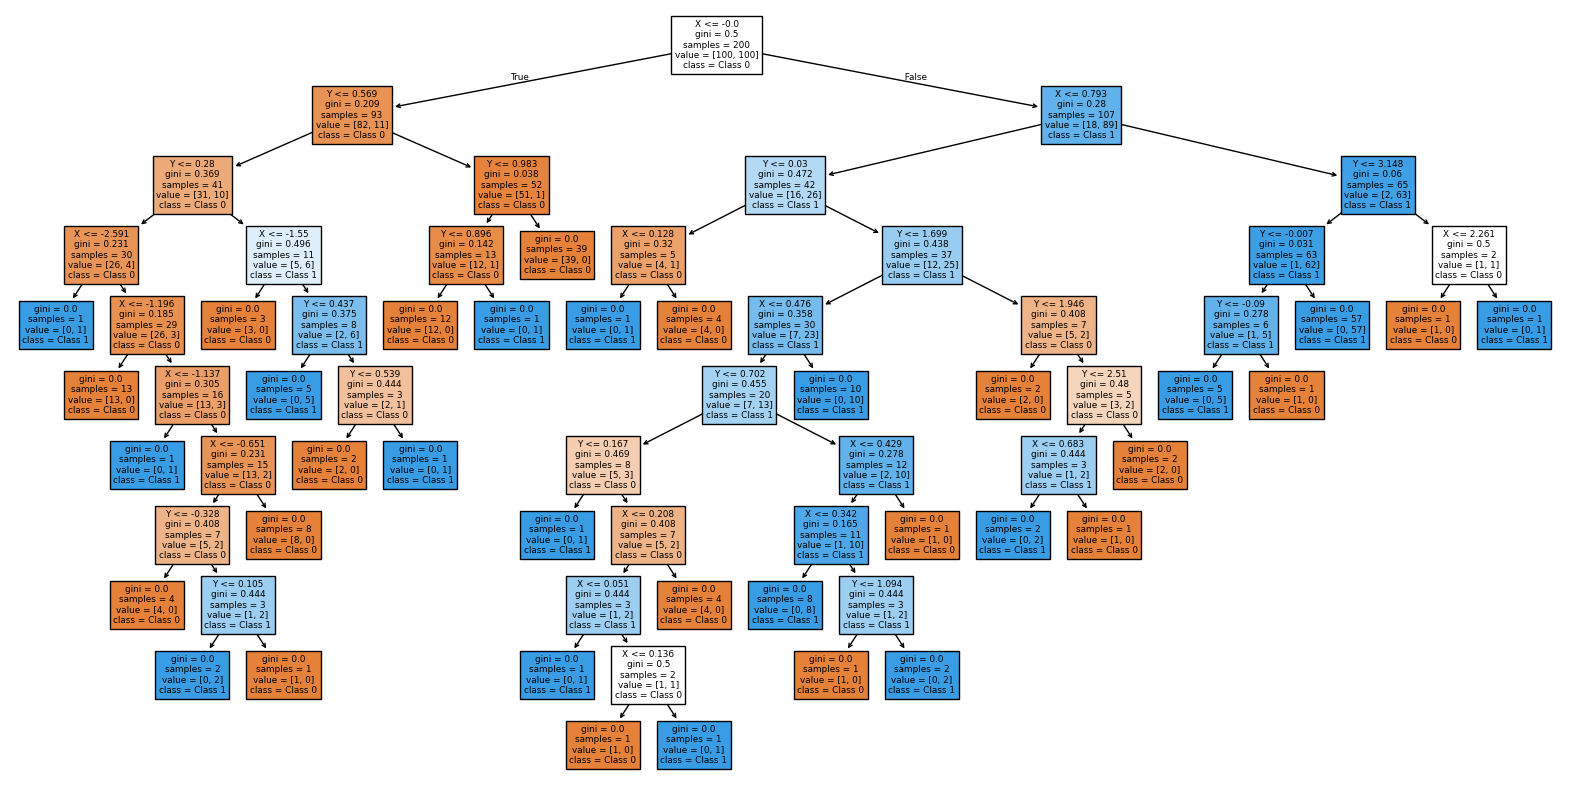

In [22]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=["X","Y"], class_names=['Class 0','Class 1'])
plt.show()